Data Cookbook:

Recipe 1: "Crimes Over Time":
Description: Load, clean, and visualize arrest and crime data over time.

Goal: Compare trends using a stacked area chart.

Tools: Python, Pandas, Matplotlib

In [2]:
# Import the necessary libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#install geopandas as mlp
!pip install geopandas matplotlib

In [9]:
#check col
crime_df.columns

Index(['Report Number', 'Report DateTime', 'Offense ID', 'Offense Date',
       'NIBRS Group AB', 'NIBRS Crime Against Category',
       'Offense Sub Category', 'Shooting Type Group', 'Block Address',
       'Latitude', 'Longitude', 'Beat', 'Precinct', 'Sector', 'Neighborhood',
       'Reporting Area', 'Offense Category', 'NIBRS Offense Code Description',
       'NIBRS_offense_code'],
      dtype='object')

In [6]:
#Load Data
crime_df = pd.read_csv('SPD_Crime_Data__2008-Present_20250504.csv')


In [17]:
 crime_df.head()

,report number,report datetime,offense id,offense date,nibrs group ab,nibrs crime against category,offense sub category,shooting type group,block address,latitude,...,neighborhood,reporting area,offense category,nibrs offense code description,nibrs_offense_code,report date,year,crime category,month,day
0,2009-095116,03/20/2009 01:58:00 AM,7665902657,03/20/2009 12:50:00 AM,A,PROPERTY,LARCENY-THEFT,-,NaN,NaN,...,-,NaN,PROPERTY CRIME,Theft From Motor Vehicle,23F,2009-03-20 01:58:00,2009,PROPERTY CRIME,3,Friday
1,2011-380459,11/25/2011 11:26:00 AM,7674046661,11/25/2011 12:30:00 AM,A,PROPERTY,LARCENY-THEFT,-,NaN,NaN,...,-,NaN,PROPERTY CRIME,All Other Larceny,23H,2011-11-25 11:26:00,2011,PROPERTY CRIME,11,Friday
2,2011-036614,01/31/2011 12:17:00 PM,7656640235,01/27/2011 12:01:00 AM,A,PROPERTY,"PROPERTY OFFENSES (INCLUDES STOLEN, DESTRUCTION)",-,NaN,NaN,...,-,NaN,ALL OTHER,Destruction/Damage/Vandalism of Property,290,2011-01-31 12:17:00,2011,ALL OTHER,1,Monday
3,2014-272495,08/16/2014 09:08:00 PM,7655103418,08/16/2014 02:00:00 PM,A,PROPERTY,MOTOR VEHICLE THEFT,-,NaN,NaN,...,-,NaN,PROPERTY CRIME,Motor Vehicle Theft,240,2014-08-16 21:08:00,2014,PROPERTY CRIME,8,Saturday
4,2019-906066,05/20/2019 01:51:09 PM,8227998755,05/16/2019 11:00:00 AM,A,PROPERTY,LARCENY-THEFT,-,NaN,NaN,...,BRIGHTON/DUNLAP,NaN,PROPERTY CRIME,All Other Larceny,23H,2019-05-20 13:51:09,2019,PROPERTY CRIME,5,Monday


Discription : Visualizations are useful tools, yet without information (for example, policy changes in police), data can be misleading.

In [11]:
#Cleaning and Wrangling the Data

#First: Crime Dataset
crime_df['Report Date'] = pd.to_datetime(crime_df['Report DateTime'])
crime_df['Year'] = crime_df['Report Date'].dt.year
crime_df['Crime Category'] = crime_df['Offense Category']


Recipe 2: "Data Cleaning in Pandas":

Description: Import a messy dataset and clean it.


Goal: Practice standardization, renaming, and null removal.


Tools: Pandas

Description: Cleaning data contributes to 80% of the workload; remember to tackle this part of the process.

In [14]:
crime_df.columns = crime_df.columns.str.strip().str.lower()
crime_df = crime_df.dropna(subset=['report datetime'])
crime_df['year'] = pd.to_datetime(crime_df['report datetime']).dt.year
crime_df['crime category'] = crime_df['offense category']


Recipe 3: "Heatmap of Arrest Frequency"

Description: Visualize arrests per month and day


Goal: Find time-based patterns.


Tools: Seaborn, Pandas

Description: Time is an important element in data, and visual trends may indicate policy effects or reporting shortcomings.


<Axes: xlabel='month', ylabel='day'>

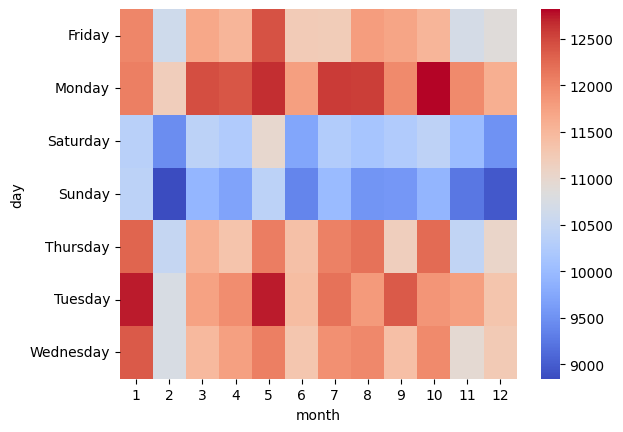

In [16]:
crime_df['month'] = pd.to_datetime(crime_df['report datetime']).dt.month # Changed df to crime_df and 'arrest_date' to 'report datetime'
crime_df['day'] = pd.to_datetime(crime_df['report datetime']).dt.day_name() # Changed df to crime_df and 'arrest_date' to 'report datetime'
pivot = crime_df.pivot_table(index='day', columns='month', values='report number', aggfunc='count') # Changed df to crime_df and assumed 'report number' as a value column, you may need to adjust this
sns.heatmap(pivot, cmap='coolwarm')

Recipe 4: "Data Ethics Checklist"
Description: Incorporate an ethical check into each project phase.


Goal: Formalize values into technical workflow.


Tools: Markdown and Code Comments

Description: Ethics must be considered at every stage of the process, not just at the end.

Ethical questions needs to be considered before you proceed with your projects:

1. Are there any biases in the dataset?
2. Who gains anything from this assessment?
3. Did I make personal information anonymous?
4. Is it possible to access my graphical representation?
